In [1]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
# Replace 'zomato.csv' with your actual dataset filename
zomato_data = pd.read_csv('zomato.csv')

# Display the first few rows of the dataset to get an overview
zomato_data.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [2]:
# Step 1: Remove unnecessary columns
zomato_cleaned = zomato_data.drop(['url', 'phone', 'menu_item'], axis=1)

# Step 2: Rename columns for better readability
zomato_cleaned.rename(columns={
    'approx_cost(for two people)': 'cost_for_two',
    'listed_in(type)': 'type_of_service',
    'listed_in(city)': 'city'
}, inplace=True)

# Step 3: Remove duplicates (if any)
zomato_cleaned.drop_duplicates(inplace=True)

# Step 4: Handle missing values (optional: based on the data)
zomato_cleaned.fillna('Unknown', inplace=True)

# Display the cleaned dataset
zomato_cleaned.head()


,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_for_two,reviews_list,type_of_service,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


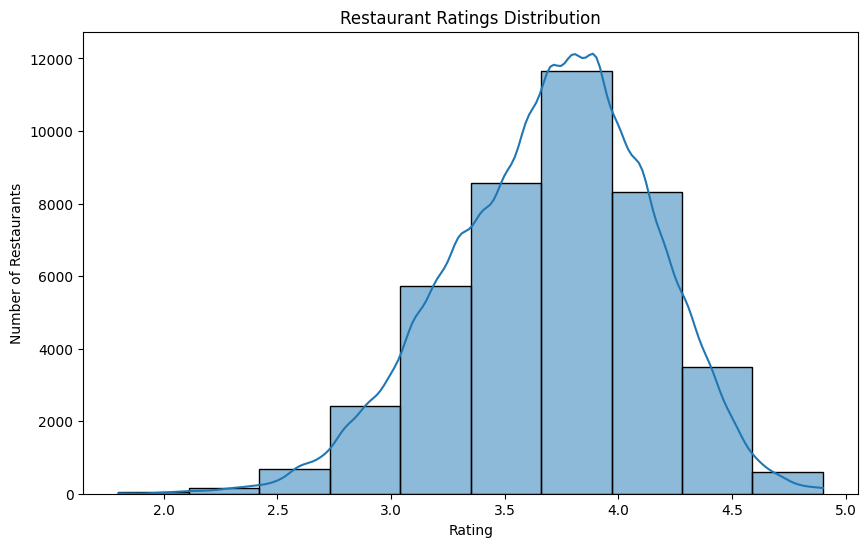

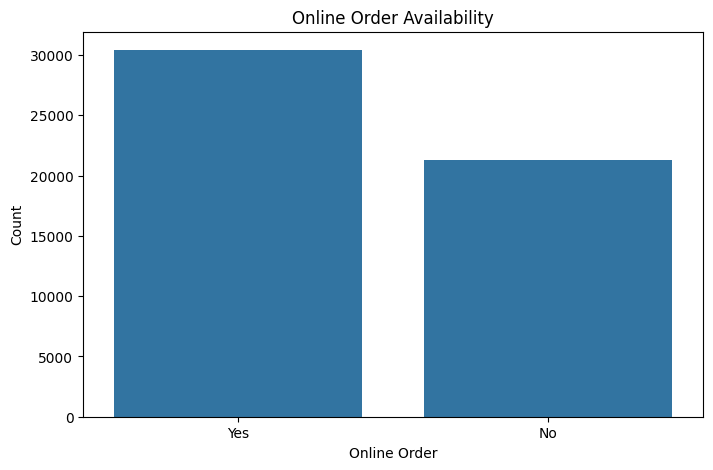

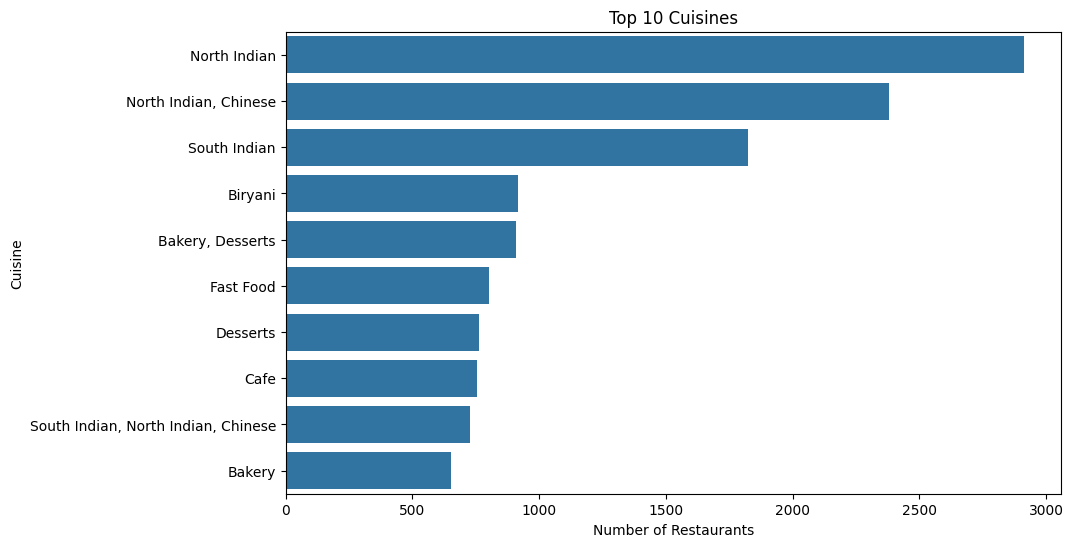

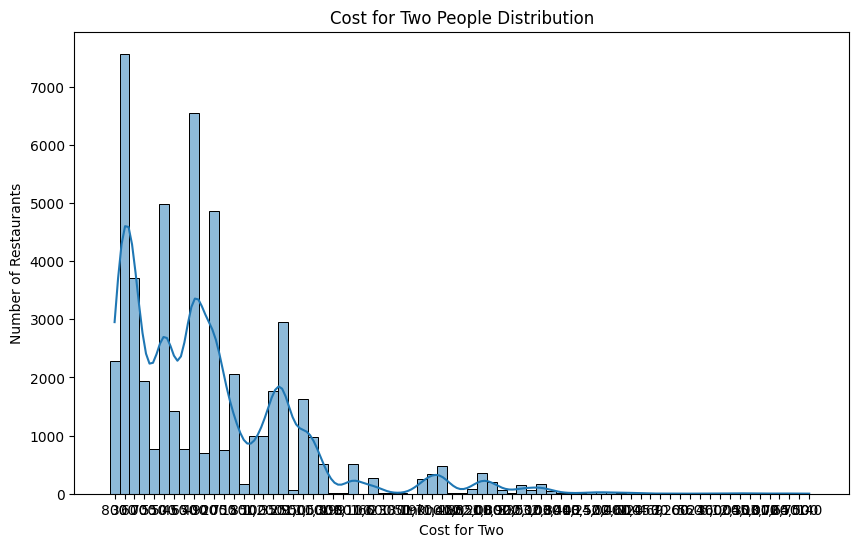

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure that 'rate' column contains only strings before applying string operations
zomato_cleaned['rate'] = zomato_cleaned['rate'].astype(str)

# Replace 'NEW' and '-' with None (for missing values), then clean the rate column
zomato_cleaned['rate'] = zomato_cleaned['rate'].replace(['NEW', '-', 'nan'], None)

# Remove the '/5' from the rate values and convert to numeric, forcing invalid entries to NaN
zomato_cleaned['rate'] = zomato_cleaned['rate'].str.replace('/5', '', regex=False)
zomato_cleaned['rate'] = pd.to_numeric(zomato_cleaned['rate'], errors='coerce')  # Convert to numeric

# Step 2: Plot Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(zomato_cleaned['rate'].dropna(), bins=10, kde=True)
plt.title('Restaurant Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()

# Step 3: Count of Restaurants Offering Online Orders
plt.figure(figsize=(8, 5))
sns.countplot(x='online_order', data=zomato_cleaned)
plt.title('Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()

# Step 4: Top Cuisines
plt.figure(figsize=(10, 6))
top_cuisines = zomato_cleaned['cuisines'].value_counts().head(10)
sns.barplot(y=top_cuisines.index, x=top_cuisines.values)
plt.title('Top 10 Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

# Step 5: Cost for Two Distribution
plt.figure(figsize=(10, 6))
sns.histplot(zomato_cleaned['cost_for_two'], bins=15, kde=True)
plt.title('Cost for Two People Distribution')
plt.xlabel('Cost for Two')
plt.ylabel('Number of Restaurants')
plt.show()


In [7]:
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Combine relevant features into a single string for each restaurant
zomato_cleaned['combined_features'] = zomato_cleaned['cuisines'] + ' ' + zomato_cleaned['location'] + ' ' + zomato_cleaned['rest_type']

# Step 2: Create a count matrix for the combined features
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(zomato_cleaned['combined_features'].fillna(''))

# Step 3: Use NearestNeighbors to find the most similar restaurants
nn_model = NearestNeighbors(metric='cosine', algorithm='brute')
nn_model.fit(count_matrix)

# Function to recommend restaurants based on nearest neighbors
def recommend_restaurants(restaurant_name, nn_model=nn_model, n_recommendations=10):
    # Get the index of the restaurant that matches the restaurant name
    idx = zomato_cleaned[zomato_cleaned['name'] == restaurant_name].index[0]
    
    # Get the nearest neighbors for the restaurant
    distances, indices = nn_model.kneighbors(count_matrix[idx], n_neighbors=n_recommendations+1)
    
    # Return the names of the recommended restaurants
    return zomato_cleaned['name'].iloc[indices.flatten()[1:]]  # Exclude the first one (itself)

# Example: Recommend similar restaurants to a restaurant
restaurant_name = "Spice Elephant"
print(f"Top 10 restaurant recommendations similar to {restaurant_name}:")
recommendations = recommend_restaurants(restaurant_name)
print(recommendations)


Top 10 restaurant recommendations similar to Spice Elephant:
564               Spice Elephant
2943              Spice Elephant
299               Spice Elephant
589      New Imperial Restaurant
63                          1947
593              Vaishali Deluxe
20824                    J Spice
572                         1947
20107      Sri Yaksha Shiv Sagar
605                      J Spice
Name: name, dtype: object


In [8]:
# Updated function to recommend restaurants based on nearest neighbors and remove duplicates
def recommend_restaurants(restaurant_name, nn_model=nn_model, n_recommendations=10):
    # Get the index of the restaurant that matches the restaurant name
    idx = zomato_cleaned[zomato_cleaned['name'] == restaurant_name].index[0]
    
    # Get the nearest neighbors for the restaurant
    distances, indices = nn_model.kneighbors(count_matrix[idx], n_neighbors=n_recommendations+1)
    
    # Get the recommended restaurant names
    recommended_restaurants = zomato_cleaned['name'].iloc[indices.flatten()[1:]]
    
    # Remove duplicates from the recommendations
    recommended_restaurants = recommended_restaurants.drop_duplicates().head(n_recommendations)
    
    return recommended_restaurants

# Example: Recommend similar restaurants to a restaurant
restaurant_name = "Spice Elephant"
print(f"Top 10 restaurant recommendations similar to {restaurant_name}:")
recommendations = recommend_restaurants(restaurant_name)
print(recommendations)


Top 10 restaurant recommendations similar to Spice Elephant:
564               Spice Elephant
589      New Imperial Restaurant
63                          1947
593              Vaishali Deluxe
20824                    J Spice
20107      Sri Yaksha Shiv Sagar
Name: name, dtype: object


In [9]:
# Updated function to recommend restaurants with rating and location filters
def recommend_restaurants(restaurant_name, nn_model=nn_model, n_recommendations=10, min_rating=3.5):
    # Get the index of the restaurant that matches the restaurant name
    idx = zomato_cleaned[zomato_cleaned['name'] == restaurant_name].index[0]
    
    # Get the nearest neighbors for the restaurant
    distances, indices = nn_model.kneighbors(count_matrix[idx], n_neighbors=100)  # Get more neighbors to filter
    
    # Get the recommended restaurant names and their corresponding indices
    recommended_restaurants = zomato_cleaned.iloc[indices.flatten()[1:]]  # Exclude the restaurant itself
    
    # Filter by minimum rating
    recommended_restaurants = recommended_restaurants[recommended_restaurants['rate'] >= min_rating]
    
    # Filter by same location (or nearby locations if desired)
    location = zomato_cleaned['location'].iloc[idx]
    recommended_restaurants = recommended_restaurants[recommended_restaurants['location'] == location]
    
    # Remove duplicates and limit to top n recommendations
    recommended_restaurants = recommended_restaurants['name'].drop_duplicates().head(n_recommendations)
    
    return recommended_restaurants

# Example: Recommend similar restaurants to a restaurant with filters
restaurant_name = "Spice Elephant"
print(f"Top 10 restaurant recommendations similar to {restaurant_name} (with rating filter):")
recommendations = recommend_restaurants(restaurant_name)
print(recommendations)


Top 10 restaurant recommendations similar to Spice Elephant (with rating filter):
564                   Spice Elephant
589          New Imperial Restaurant
63                              1947
593                  Vaishali Deluxe
20824                        J Spice
20107          Sri Yaksha Shiv Sagar
2924                  Green Gardenia
20470                 Hara Fine Dine
3632                   Swadesh Tadka
3742     Blue Wings Bar & Restaurant
Name: name, dtype: object


In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to extract sentiment score for each review
def analyze_review_sentiment(review_text):
    if not review_text:  # If the review is empty or missing
        return 0
    
    # VADER sentiment analysis
    sentiment_score = analyzer.polarity_scores(review_text)
    
    # Classify sentiment as positive, neutral, or negative
    if sentiment_score['compound'] >= 0.05:
        return 1  # Positive sentiment
    elif sentiment_score['compound'] <= -0.05:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment

# Apply sentiment analysis to each restaurant's reviews
# Assuming reviews_list column contains the reviews as a list of tuples
# We'll extract the first element of each tuple (the review text)
zomato_cleaned['sentiment_score'] = zomato_cleaned['reviews_list'].apply(lambda reviews: sum(analyze_review_sentiment(review[1]) for review in eval(reviews)))

# Check the results
zomato_cleaned[['name', 'sentiment_score']].head()


,name,sentiment_score
0,Jalsa,11
1,Spice Elephant,10
2,San Churro Cafe,12
3,Addhuri Udupi Bhojana,35
4,Grand Village,2


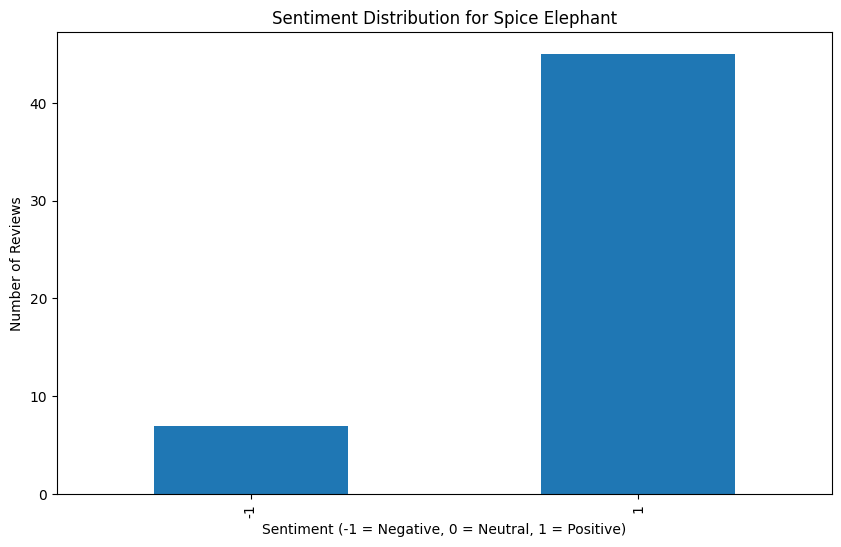

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot sentiment distribution for a restaurant
def plot_sentiment_distribution(restaurant_name):
    # Filter the data for the specific restaurant
    restaurant_data = zomato_cleaned[zomato_cleaned['name'] == restaurant_name]
    
    sentiment_scores = []
    
    # Process reviews and extract sentiment scores
    for reviews in restaurant_data['reviews_list']:
        for review in eval(reviews):  # The review is a tuple (rating, review text)
            sentiment_score = analyze_review_sentiment(review[1])  # Analyze review text
            sentiment_scores.append(sentiment_score)
    
    # If we have sentiment data, plot the distribution
    if sentiment_scores:
        plt.figure(figsize=(10, 6))
        pd.Series(sentiment_scores).value_counts().sort_index().plot(kind='bar')
        plt.title(f'Sentiment Distribution for {restaurant_name}')
        plt.xlabel('Sentiment (-1 = Negative, 0 = Neutral, 1 = Positive)')
        plt.ylabel('Number of Reviews')
        plt.show()
    else:
        print(f"No valid sentiment data available for {restaurant_name}.")

# Example: Plot sentiment distribution for a restaurant
plot_sentiment_distribution("Spice Elephant")


In [17]:
# Updated function to recommend restaurants based on nearest neighbors, rating, and sentiment
def recommend_restaurants(restaurant_name, nn_model=nn_model, n_recommendations=10, min_rating=3.5, min_sentiment_score=5):
    # Get the index of the restaurant that matches the restaurant name
    idx = zomato_cleaned[zomato_cleaned['name'] == restaurant_name].index[0]
    
    # Get the nearest neighbors for the restaurant
    distances, indices = nn_model.kneighbors(count_matrix[idx], n_neighbors=100)  # Get more neighbors to filter
    
    # Get the recommended restaurant names and their corresponding indices
    recommended_restaurants = zomato_cleaned.iloc[indices.flatten()[1:]]  # Exclude the restaurant itself
    
    # Filter by minimum rating and sentiment score
    recommended_restaurants = recommended_restaurants[(recommended_restaurants['rate'] >= min_rating) & 
                                                      (recommended_restaurants['sentiment_score'] >= min_sentiment_score)]
    
    # Filter by location (optional)
    location = zomato_cleaned['location'].iloc[idx]
    recommended_restaurants = recommended_restaurants[recommended_restaurants['location'] == location]
    
    # Remove duplicates and limit to top n recommendations
    recommended_restaurants = recommended_restaurants['name'].drop_duplicates().head(n_recommendations)
    
    return recommended_restaurants

# Example: Recommend similar restaurants to "Spice Elephant"
restaurant_name = "Spice Elephant"
print(f"Top 10 restaurant recommendations similar to {restaurant_name} (with rating and sentiment filter):")
recommendations = recommend_restaurants(restaurant_name)
print(recommendations)


Top 10 restaurant recommendations similar to Spice Elephant (with rating and sentiment filter):
564                   Spice Elephant
589          New Imperial Restaurant
63                              1947
20470                 Hara Fine Dine
3742     Blue Wings Bar & Restaurant
20399                          Jalsa
2812                       Thamboola
97              Ayda Persian Kitchen
Name: name, dtype: object
